In [1]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from nltk.tokenize import word_tokenize 
from gensim.utils import tokenize
from nltk.tokenize import sent_tokenize
import pandas as pd
import nltk
from nltk.tokenize.treebank import TreebankWordDetokenizer
from scipy.spatial import distance
# from wordcloud import WordCloud, STOPWORDS

In [2]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import time
import codecs
import csv
from sklearn import feature_extraction
import collections 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem.snowball import SnowballStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.manifold import MDS

from scipy.spatial import distance
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import nltk.stem as stemmer


In [3]:
# one-time downloads
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Angad Sandhu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to C:\Users\Angad
[nltk_data]     Sandhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Angad
[nltk_data]     Sandhu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
def rem_stop_words(example_sent):
    
    example_sent = str(example_sent.lower())
    stop_words = set(stopwords.words('english')) 

    word_tokens = word_tokenize(example_sent) 
  
    filtered_sentence = [] 
  
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w)
            if w == "." or w == "?" or w == "!" or w == "," or w =="'" or w == "’" or w == "”" or w == ":" or w == "‘" or w == "“":
                filtered_sentence = filtered_sentence[:-2]
            filtered_sentence.append(" ")
    TreebankWordDetokenizer().detokenize(filtered_sentence)
    return(filtered_sentence) 

# Take in a string and remove punctuation, repeat lines, etc.
# RETURN: string (cleaned up)
def cleaner(text):
    
    text = re.sub('NOTE- TERMS IN BRACKETS HAVE BEEN EDITED TO PROTECT CONFIDENTIALITY','', text)
    text = re.sub('<BR/>',' ', text)
    text = text.lower()
    text = re.sub('[****]','',text)
    
    text = re.sub('[/%#;:!,.<>\'?\"()-\[\]]',' ',text)
    text = re.sub('[0-9*]','',text)

    text = re.sub(r'(?:^| )\w(?:$| )', ' ', text)
    
    a = nltk.pos_tag(tokenize_only(text))
    a = pd.DataFrame(a)
    a = a[a[1] == 'NN']
    text = ' '.join(a[0])
    
    return(text)
def to_lower(text):
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    re.sub(r"\S*https?:\S*", "", text)
    text = text.lower()
    #text = re.sub(, "", text)
    return(text)

def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            if(stemmer.stem(token) not in rem_words):
                filtered_tokens.append(token)
    return filtered_tokens

def tokenize_and_stem(text, rem_words):
    
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    stems = [e for e in stems if e not in rem_words ]
    return stems
stemmer = SnowballStemmer("english")

In [5]:
# rem_words_1 = "survey,nurse,cited,am,pm,resident,residents,she,not,review,facility,state,have,year,employee,reported,management,"
# rem_words_2 = "he,staff,interview,care,date,reveal,record,be,month,document,physician,lpn,na,code,description,previous,hospital,m,"
# rem_words_3 = "observation,stated,assessment,don,mds,gna,cna,pa,cm,medical,names,order,status,immediately,redacted,condition,plan,"
# rem_words_4 = "administrative,note,time,indicated,incident,redirected,director,uses,include,inr,rn,investigation,asked,following,"
# rem_words_5 = "provided,alleged,failed,identified,said,ei,ri,parking,assist,every,get,"
# rem_words_6 = "room,left,mm,hg,adl,xl,day,mg,mar,knows,prn,look,ard,give,ml,also,ted,made,non,bims,pasrr," # 7/13 update
#rem_words = rem_words_1 + rem_words_2 + rem_words_3 + rem_words_4 + rem_words_5 + rem_words_6 + num_alphas

num_alphas  = "one,two,three,four,five,six,seven,eight,nine,ten,"
rem_words = num_alphas
rem_words = rem_words.split(',')
rem_words = [stemmer.stem(t) for t in rem_words]

In [6]:
jan1_dataset = pd.read_csv("./data/nyt/jan1.csv", delimiter = "/t")
jan2_dataset = pd.read_csv("./data/nyt/jan2.csv", delimiter = "/t")
aug1_dataset = pd.read_csv("./data/nyt/aug1.csv", delimiter = "/t")
aug2_dataset = pd.read_csv("./data/nyt/aug2.csv", delimiter = "/t")
dec1_dataset = pd.read_csv("./data/nyt/dec1.csv", delimiter = "/t")
dec2_dataset = pd.read_csv("./data/nyt/dec2.csv", delimiter = "/t")

C:\Users\Angad Sandhu\AppData\Local\Temp\ipykernel_46156\1495447518.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  jan1_dataset = pd.read_csv("./data/nyt/jan1.csv", delimiter = "/t")
C:\Users\Angad Sandhu\AppData\Local\Temp\ipykernel_46156\1495447518.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  jan2_dataset = pd.read_csv("./data/nyt/jan2.csv", delimiter = "/t")
C:\Users\Angad Sandhu\AppData\Local\Temp\ipykernel_46156\1495447518.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are in

In [7]:
jan1_dataset.head(3)

,Headlines,Glances
0,No More Statutes of Limitations for Rape,Bill Cosby came close to escaping sexual assau...
1,No. 1 Clemson Advances to National Championshi...,"Led by quarterback Deshaun Watson, the Tigers ..."
2,"Howard Davis Jr., Who Beat Grief to Win Boxing...","Davis, who was mourning his mother when he ear..."


In [8]:
aug2_dataset.head(3)

,Headlines,Glances
0,Germany Eliminates U.S. Women’s Field Hockey i...,"The United States fell behind, 2-0, to Germany..."
1,"Gerald Grosvenor, British Duke and Billionaire...",The sixth Duke of Westminster was the country’...
2,N.F.L. Threatens to Suspend Four Players for N...,"Julius Peppers, Clay Matthews, James Harrison ..."


In [9]:
dec1_dataset.head(3)

,Headlines,Glances
0,Guggenheim Helsinki Museum Plans Are Rejected,Lawmakers in the Finnish city voted down a pro...
1,North Carolina’s Sore Loser,"Gov. Pat McCrory, rejected by the voters, is e..."
2,Mahmoud Abbas Proposes Palestinian Unity Gover...,"Addressing a conference of his Fatah party, Mr..."


In [10]:
jan1_dataset = jan1_dataset['Headlines'].map(str) + '. ' + jan1_dataset['Glances'].map(str)
jan2_dataset = jan2_dataset['Headlines'].map(str) + '. ' + jan2_dataset['Glances'].map(str)
aug1_dataset = aug1_dataset['Headlines'].map(str) + '. ' + aug1_dataset['Glances'].map(str)
aug2_dataset = aug2_dataset['Headlines'].map(str) + '. ' + aug2_dataset['Glances'].map(str)
dec1_dataset = dec1_dataset['Headlines'].map(str) + '. ' + dec1_dataset['Glances'].map(str)
dec2_dataset = dec2_dataset['Headlines'].map(str) + '. ' + dec2_dataset['Glances'].map(str)

In [11]:
jan = jan1_dataset.append(jan2_dataset, ignore_index = True)
aug = aug1_dataset.append(aug2_dataset, ignore_index = True)
dec = dec1_dataset.append(dec2_dataset, ignore_index = True)

C:\Users\Angad Sandhu\AppData\Local\Temp\ipykernel_46156\3911213382.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jan = jan1_dataset.append(jan2_dataset, ignore_index = True)
C:\Users\Angad Sandhu\AppData\Local\Temp\ipykernel_46156\3911213382.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aug = aug1_dataset.append(aug2_dataset, ignore_index = True)
C:\Users\Angad Sandhu\AppData\Local\Temp\ipykernel_46156\3911213382.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dec = dec1_dataset.append(dec2_dataset, ignore_index = True)


In [12]:
print(len(jan1_dataset)+len(jan2_dataset),len(jan))
print(len(aug1_dataset)+len(aug2_dataset),len(aug))
print(len(dec1_dataset)+len(dec2_dataset),len(dec))

2006 2006
2001 2001
1798 1798


In [13]:
print(jan[0], aug[1010], dec[2], sep = '\n\n')

No More Statutes of Limitations for Rape. Bill Cosby came close to escaping sexual assault charges. How many others do?

Germany Eliminates U.S. Women’s Field Hockey in a Quarterfinal. The United States fell behind, 2-0, to Germany in the first period and could not tie the score. One American goal was taken away on video review.

Mahmoud Abbas Proposes Palestinian Unity Government With Hamas. Addressing a conference of his Fatah party, Mr. Abbas sought to push forward long-stalled efforts to reconcile the two major competing Palestinian factions.


In [14]:
cleaned_jan = []
cleaned_aug = []
cleaned_dec = []

In [15]:
for k in jan: cleaned_jan.append(''.join(rem_stop_words(k)))
for k in aug: cleaned_aug.append(''.join(rem_stop_words(k)))
for k in dec: cleaned_dec.append(''.join(rem_stop_words(k)))

In [16]:
print(cleaned_jan[0], cleaned_aug[1010], cleaned_dec[2], sep = '\n\n')

statutes limitations rape bill cosby came close escaping sexual assault charges many others 

germany eliminates u.s. women field hockey quarterfinal united states fell behind 2-0 germany first period could tie score one american goal taken away video review 

mahmoud abbas proposes palestinian unity government hamas addressing conference fatah party mr. abbas sought push forward long-stalled efforts reconcile two major competing palestinian factions 


In [17]:
jan_vectors = [nltk.word_tokenize(cleaned_jan) for cleaned_jan in cleaned_jan]
aug_vectors = [nltk.word_tokenize(cleaned_aug) for cleaned_aug in cleaned_aug]
dec_vectors = [nltk.word_tokenize(cleaned_dec) for cleaned_dec in cleaned_dec]

In [18]:
jan_model = Word2Vec(jan_vectors)
aug_model = Word2Vec(aug_vectors)
dec_model = Word2Vec(dec_vectors)

In [19]:
jan_model.wv.most_similar("sports", topn = 10)

[('city', 0.9658533334732056),
 ('mr.', 0.965450644493103),
 ('state', 0.9654482007026672),
 ('police', 0.9652068614959717),
 ('team', 0.9650338888168335),
 ('president', 0.964967668056488),
 ('first', 0.9649149775505066),
 ('work', 0.964876651763916),
 ('last', 0.9648411870002747),
 ('two', 0.9644590020179749)]

In [20]:
aug_model.wv.most_similar("sports", topn = 100)

[('like', 0.990612268447876),
 ('country', 0.99017333984375),
 ('mr.', 0.9901441931724548),
 ('rio', 0.990090012550354),
 ('music', 0.9899954199790955),
 ('police', 0.9898656606674194),
 ('president', 0.9898623824119568),
 ('series', 0.9897141456604004),
 ('readers', 0.9896591901779175),
 ('many', 0.9896560311317444),
 ('said', 0.9895200133323669),
 ('still', 0.9895018935203552),
 ('team', 0.9894329309463501),
 ('years', 0.9893271327018738),
 ('people', 0.9892781972885132),
 ('world', 0.989262044429779),
 ('new', 0.9892016649246216),
 ('china', 0.9891262650489807),
 ('olympic', 0.9890998005867004),
 ('war', 0.9890785813331604),
 ('two', 0.9890009164810181),
 ('military', 0.9889838695526123),
 ('could', 0.9889411330223083),
 ('first', 0.988917887210846),
 ('show', 0.988789439201355),
 ('work', 0.988663911819458),
 ('yankees', 0.9885494112968445),
 ('says', 0.9885241985321045),
 ('american', 0.9884622097015381),
 ('women', 0.9884535670280457),
 ('one', 0.9883913397789001),
 ('dies', 0.98

In [21]:
dec_model.wv.most_similar("sports", topn = 100)

[('president', 0.9656460285186768),
 ('would', 0.964421272277832),
 ('three', 0.9635287523269653),
 ('change', 0.9629695415496826),
 ('government', 0.9628058671951294),
 ('two', 0.9625817537307739),
 ('could', 0.9624937772750854),
 ('russia', 0.9621400833129883),
 ('back', 0.9617983102798462),
 ('still', 0.9616525173187256),
 ('trump', 0.9615432620048523),
 ('mr.', 0.9615288376808167),
 ('make', 0.9611717462539673),
 ('prime', 0.9611583948135376),
 ('season', 0.9611340165138245),
 ('new', 0.9610781073570251),
 ('says', 0.961066722869873),
 ('court', 0.9609964489936829),
 ('attack', 0.9609403610229492),
 ('team', 0.9608994126319885),
 ('said', 0.960892915725708),
 ('women', 0.9605609178543091),
 ('year', 0.9605298638343811),
 ('country', 0.9604044556617737),
 ('one', 0.9603869318962097),
 ('state', 0.9600490927696228),
 ('even', 0.960034191608429),
 ('first', 0.959821343421936),
 ('..', 0.9598023891448975),
 ('may', 0.9596399664878845),
 ('russian', 0.9595057368278503),
 ('minister', 0.

In [22]:
jan_model.wv.most_similar("sports", topn = 100)

[('city', 0.9658533334732056),
 ('mr.', 0.965450644493103),
 ('state', 0.9654482007026672),
 ('police', 0.9652068614959717),
 ('team', 0.9650338888168335),
 ('president', 0.964967668056488),
 ('first', 0.9649149775505066),
 ('work', 0.964876651763916),
 ('last', 0.9648411870002747),
 ('two', 0.9644590020179749),
 ('music', 0.9643733501434326),
 ('dance', 0.9642733931541443),
 ('week', 0.9640741944313049),
 ('ms.', 0.964013397693634),
 ('would', 0.9640041589736938),
 ('government', 0.9637659192085266),
 ('knicks', 0.9635998010635376),
 ('new', 0.9635287523269653),
 ('women', 0.9633657336235046),
 ('said', 0.9632523059844971),
 ('teams', 0.9631854295730591),
 ('war', 0.9631350636482239),
 ('dies', 0.9631022810935974),
 ('star', 0.9630962610244751),
 ('one', 0.9630388617515564),
 ('obama', 0.9628710746765137),
 ('trump', 0.9628075957298279),
 ('years', 0.9628064632415771),
 ('world', 0.9627496004104614),
 ('coach', 0.962730348110199),
 ('american', 0.962723433971405),
 ('museum', 0.962706

In [23]:
j = distance.cosine(jan_model.wv["race"] , jan_model.wv['tennis'])
print(j)

0.0834912657737732


In [43]:
t1 = "race"
t2 = 'tennis'

val1 = jan_model.wv[t1]

val2 = jan_model.wv[t2]
print(val2)

# if not jan_model.wv[t2]:
#     print("oops")
#     val2 = 10
# else:
#     val2 = jan_model.wv[t2]
#     print(val2)


j = distance.cosine(val1 , val2)

[-0.02492658  0.0278069   0.00976755  0.01055398  0.00134971 -0.02867077
  0.00735085  0.04475636 -0.0041492   0.00180992 -0.01426489 -0.03190466
 -0.00206268  0.01571588 -0.00298997 -0.01504361  0.00664304 -0.02462585
  0.00446553 -0.03934927  0.00802747  0.01168154  0.00303005 -0.01468797
  0.0062272  -0.00824677 -0.0180748  -0.01075765 -0.02443989  0.00508379
  0.02876261  0.00693598  0.00847858 -0.00018384 -0.00517708  0.0377428
  0.00069992 -0.02451934 -0.02231254 -0.05766664  0.00144289 -0.01240334
 -0.01168272  0.01070215  0.00316843 -0.02242561 -0.0236366  -0.00594093
  0.00399097  0.02678657  0.01605918 -0.00330836 -0.01112434  0.00644305
 -0.01119441  0.01370619  0.02269539 -0.00479165 -0.02309172  0.00039116
  0.01395684  0.01898719 -0.01064276  0.00222603 -0.03801022  0.0260216
 -0.00230839  0.02310234 -0.02483011  0.02111024 -0.01160305  0.00563065
  0.02157688 -0.01771199  0.01630568  0.0119425  -0.0068142  -0.01018655
 -0.02413543 -0.00448151 -0.00685604 -0.01204213 -0.0

In [44]:
rel = []

if not rel:
    print("waah")

waah


In [24]:
a = distance.cosine(aug_model.wv['race'] , aug_model.wv['tennis'])
print(a)

0.02174544334411621


In [25]:
d = distance.cosine(dec_model.wv['race'] , dec_model.wv['tennis'])
print(d)

0.4847371578216553


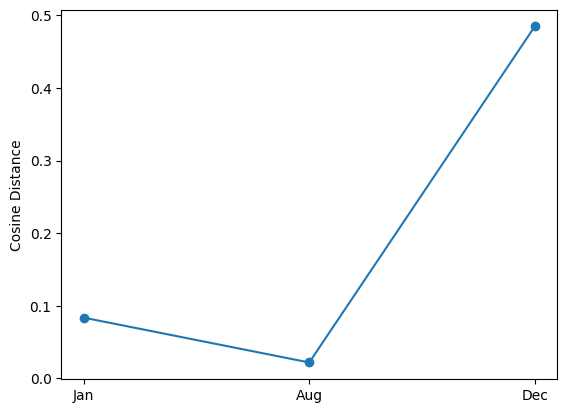

In [26]:
plt.ylabel('Cosine Distance')
plt.plot(['Jan', 'Aug', 'Dec'], [j, a, d], marker = 'o')

plt.show()

In [27]:
j = distance.cosine(jan_model.wv["run"] , jan_model.wv['tennis'])
print(j)

0.08522820472717285


In [28]:
a = distance.cosine(aug_model.wv['run'] , aug_model.wv['tennis'])
print(a)

0.024388432502746582


In [29]:
d = distance.cosine(dec_model.wv['run'] , dec_model.wv['tennis'])
print(d)

0.38158202171325684


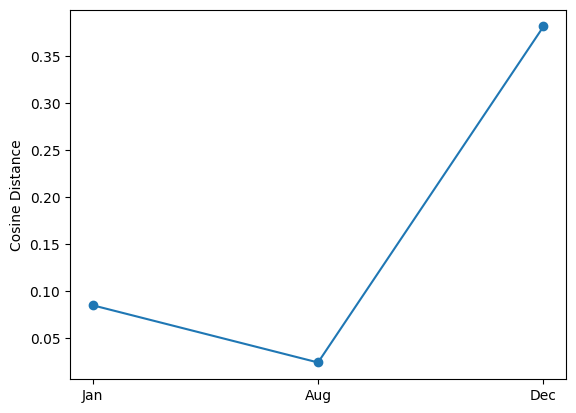

In [30]:
plt.ylabel('Cosine Distance')
plt.plot(['Jan', 'Aug', 'Dec'], [j, a, d], marker = 'o')

plt.show()

In [31]:
j = distance.cosine(jan_model.wv["sports"] , jan_model.wv['city'])
print(j)

0.03414672613143921


In [32]:
a = distance.cosine(aug_model.wv['sports'] , aug_model.wv['city'])
print(a)

0.012771189212799072


In [33]:
d = distance.cosine(dec_model.wv['sports'] , dec_model.wv['city'])
print(d)

0.045512378215789795


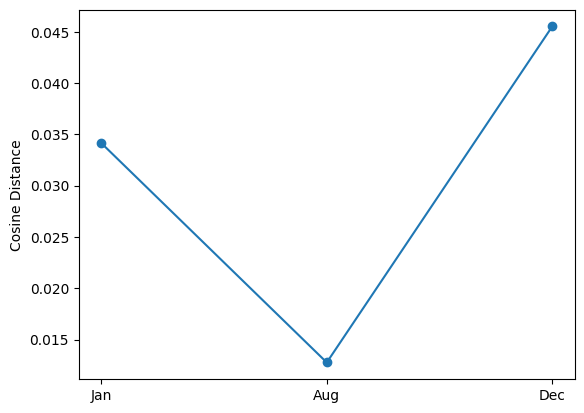

In [34]:
plt.ylabel('Cosine Distance')
plt.plot(['Jan', 'Aug', 'Dec'], [j, a, d], marker = 'o')

plt.show()

In [35]:
def word_cloud(month, word):
    if month == "jan":
        dataset = jan_model.wv.most_similar(word, topn = 50)
    elif month == "aug":
        dataset = aug_model.wv.most_similar(word, topn = 50)
    elif month == "dec":
        dataset = dec_model.wv.most_similar(word, topn = 50)
    comment_words = ''
    stopwords = set(STOPWORDS)
    for val in dataset:
        


        # typecaste each val to string
        val = str(val)
        val = val.replace("'","")

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

In [36]:
word_cloud("jan", "american")

NameError: name 'STOPWORDS' is not defined

In [ ]:
word_cloud("aug", "sports")

In [ ]:
word_cloud("dec", "sports")

In [ ]:
def top_k_words(word1, word2, n):
    arr = []
    jan = jan_model.wv.most_similar(word1, topn = n)
    aug = aug_model.wv.most_similar(word1, topn = n)
    dec = dec_model.wv.most_similar(word1, topn = n)
    empty_array = np.empty((0, 3), float)
    month_list = [jan_mode.w, aug, dec]
    for i in range(n):
        for month in month_list:
            arr.append(distance.cosine(month[jan] , month_model.wv[word2]))
        print(arr)
        empty_array = np.append(empty_array, np.array([arr]), axis=0)
        print(empty_array)
        arr = []
    for i in range(4):
        plt.plot(['Jan', 'Aug', 'Dec'], empty_array[i], marker = 'o')   